In [0]:
!git clone https://github.com/mopicala-group/handwriting-ocr.git

Cloning into 'handwriting-ocr'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 1447 (delta 108), reused 129 (delta 61), pack-reused 1251
Receiving objects: 100% (1447/1447), 517.55 MiB | 32.36 MiB/s, done.
Resolving deltas: 100% (790/790), done.


In [0]:
     !pip install -U -q PyDrive ## you will have install for every colab session

     from pydrive.auth import GoogleAuth
     from pydrive.drive import GoogleDrive
     from google.colab import auth
     from oauth2client.client import GoogleCredentials

     # 1. Authenticate and create the PyDrive client.
     auth.authenticate_user()
     gauth = GoogleAuth()
     gauth.credentials = GoogleCredentials.get_application_default()
     drive = GoogleDrive(gauth)

In [0]:
#https://drive.google.com/file/d/1YbmsiJK3Wclfm6K8PrJuz-QROEKX1qis/view

#download pre traind models
import json
json_import = drive.CreateFile({'id':'1YbmsiJK3Wclfm6K8PrJuz-QROEKX1qis'})
json_import.GetContentFile('ocr-handwriting-models.zip')

In [0]:
%cd /content/handwriting-ocr/models

/content/handwriting-ocr/models


In [0]:
!unzip /content/ocr-handwriting-models.zip

Archive:  /content/ocr-handwriting-models.zip
   creating: char-clas/
   creating: char-clas/en/
  inflating: char-clas/en/checkpoint  
  inflating: char-clas/en/CharClassifier.meta  
  inflating: char-clas/en/CharClassifier.index  
  inflating: char-clas/en/CharClassifier.data-00000-of-00001  
   creating: char-clas/en/Bi-RNN/
  inflating: char-clas/en/Bi-RNN/model_1.meta  
  inflating: char-clas/en/Bi-RNN/model_1.data-00000-of-00001  
  inflating: char-clas/en/Bi-RNN/model_1.index  
  inflating: char-clas/en/Bi-RNN/checkpoint  
   creating: char-clas/cz/
  inflating: char-clas/cz/CharClassifier.meta  
  inflating: char-clas/cz/CharClassifier.data-00000-of-00001  
  inflating: char-clas/cz/CharClassifier.index  
  inflating: char-clas/cz/checkpoint  
   creating: char-clas/cz/Bi-RNN/
  inflating: char-clas/cz/Bi-RNN/model_2.index  
  inflating: char-clas/cz/Bi-RNN/model_2.meta  
  inflating: char-clas/cz/Bi-RNN/checkpoint  
  inflating: char-clas/cz/Bi-RNN/model_2.data-00000-of-00001 

In [0]:
!pip install simplejson
!pip install unidecode

     |████████████████████████████████| 92kB 2.4MB/s 
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114200 sha256=472c1aa4c4c5a9d9aa0157ee2415df71fa081fb114e735550409dc46e57b1a7a
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built simplejson
     |████████████████████████████████| 245kB 2.7MB/s 


In [0]:
!pip install --upgrade tensorflow==1.4

     |████████████████████████████████| 41.2MB 103kB/s 
     |████████████████████████████████| 1.7MB 43.7MB/s 
     |████████████████████████████████| 890kB 38.9MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=1faf22d15999fa78bf28e4cf95d7f0d199eab1128090f1c6d17fbe41afcd32ea
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [0]:
%cd /content/handwriting-ocr/

/content/handwriting-ocr


In [0]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('src')
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

Loading segmentation models...
INFO:tensorflow:Restoring parameters from /content/handwriting-ocr/src/ocr/../../models/gap-clas/CNN-CG
INFO:tensorflow:Restoring parameters from /content/handwriting-ocr/src/ocr/../../models/gap-clas/RNN/Bi-RNN-new


In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [0]:
IMG = 'data/pages/test4.jpg'    # 1, 2, 3
LANG = 'en'
# You can use only one of these two
# You HABE TO train the CTC model by yourself using word_classifier_CTC.ipynb
MODEL_LOC_CHARS = 'models/char-clas/' + LANG + '/CharClassifier'
MODEL_LOC_CTC = 'models/word-clas/CTC/Classifier1'

In [0]:
CHARACTER_MODEL = Model(MODEL_LOC_CHARS)
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

INFO:tensorflow:Restoring parameters from models/char-clas/en/CharClassifier
INFO:tensorflow:Restoring parameters from models/word-clas/CTC/Classifier1


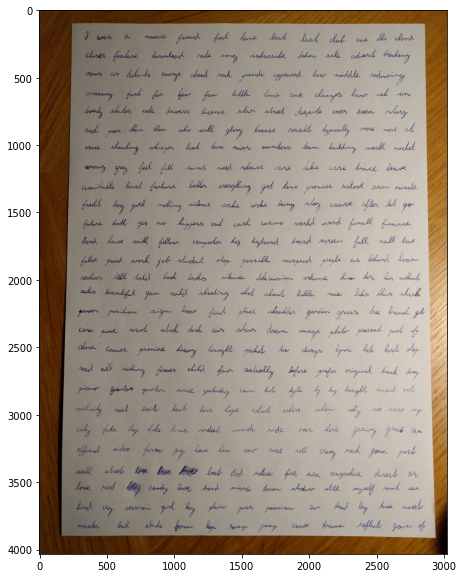

In [0]:
image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
implt(image)

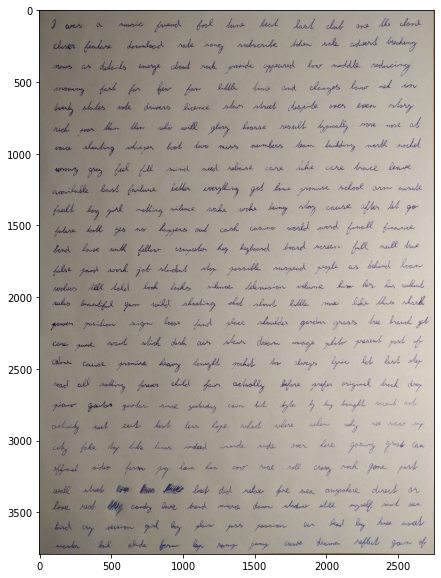

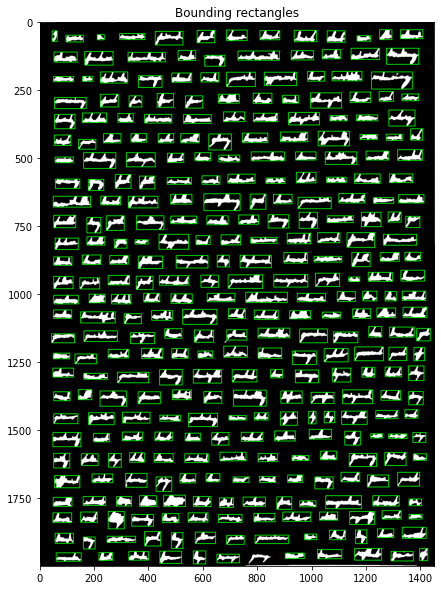

In [0]:
# Crop image and get bounding boxes
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

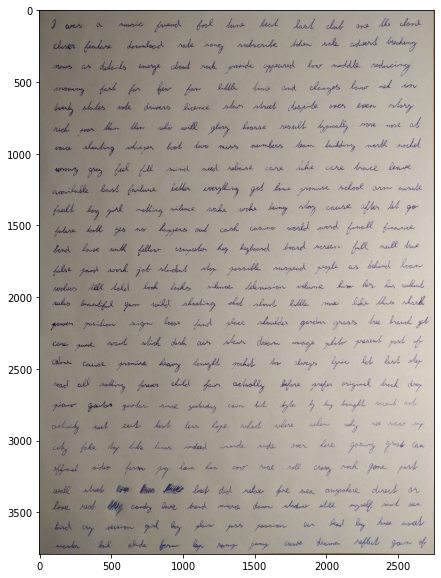

I upas a music friend fool tune beat last club one the clone
closer feature downloact rale song subscriebe token sale advert breakeng
news as details emerp about rock provide apYeared low middle reducing
pnoving fast far few fgn little time and changes lanp net in
toenty states oote drivers liance stm street despite over wen story
rich than then who will glory hoarse result typically sore nose at
poor
voice skouting rohisper boot two miss numbers team building north rochet
vvrong gray fed fill mincl need release ciare take care trace leave
amilable least failure better everything got home pmm school arm minute
fault bog girl nothing silence wake woke beinvg stay cause after let v
future tooth yes no kappens out cash asino world npord finall finance
bond have with fellonr computer key keyboard board screen frll null true
fwlee pw work job strdont stop possible suspenct people us bekind loan
wolees tell tald look looks silence televesion volermee him ber his wdeout
rules beautiful gun wi

In [0]:
def recognise(img):
    """Recognition using character model"""
    # Pre-processing the word
    img = word_normalization(
        img,
        60,
        border=False,
        tilt=True,
        hyst_norm=True)

    # Separate letters
    img = cv2.copyMakeBorder(
        img,
        0, 0, 30, 30,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0])
    gaps = characters.segment(img, RNN=True)

    chars = []
    for i in range(len(gaps)-1):
        char = img[:, gaps[i]:gaps[i+1]]
        char, dim = letter_normalization(char, is_thresh=True, dim=True)
        # TODO Test different values
        if dim[0] > 4 and dim[1] > 4:
            chars.append(char.flatten())

    chars = np.array(chars)
    word = ''        
    if len(chars) != 0:
        pred = CHARACTER_MODEL.run(chars)                
        for c in pred:
            word += idx2char(c)

    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

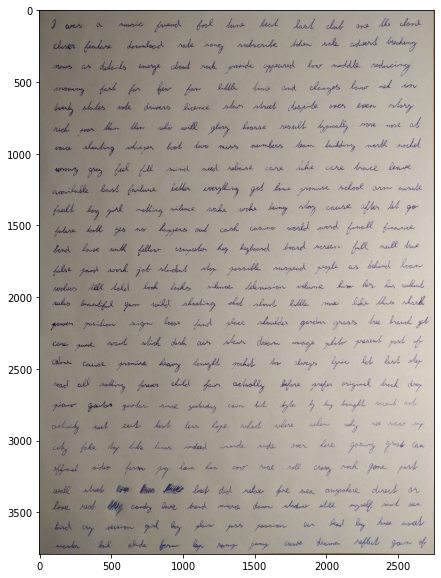

H vZr Z ltrhb eqhdmc annk stmd adZs kZrs bkta nmd sgd bknmd
bknrdq edZstqd cnvmkZZc qZsd rnmf rtarbqhad sngdm rZkd Zcudqs aqnjhmf
mdvr Zr cdsZhkr dmdqfd Zants qnbj oquhcd ZoodZqdc knv lhcckdq qdctbhmf
lnuhmf eZrs eZq edv eZq khsskd shm Zmc bgZmfdr kZm mds hm
sudmsx rsZsdr unsd cqhudqr khbdmbd rsZq rsqdds cdrohsd nudq dudm rsnqx
qhbg RsgZh sgdm vgn vhkk fknx gnZqrd qdrtks ohbZkkx rnqd lnrd Zs
onnq
unhbd rgZmshmf vghrodq anns svn lhrr mtladqr sdZl athkchmf lnqsg qnbjds
vqnmf fqZx addk ehkk lhmc mddc qdaZrd bZqd sgd btqd sqZbd kZud
ZuZhkZakd aZrs eZqktmd adssdq dudqfghmf fns gnld oqnlhrd rbgnng Zql lhmtsd
entks anx fhqk mZsjhmf rhkZmbd vZjd vnjd ahmf rsZx bZtrd Zesdq kds fn
etstqd snnsg xdr mn gZoodmr nts bZrg bZrhmn vnqkc vnqc ehlZkk ehqZmbd
anmc gZud vhsg adkknv bnlotsdq jdx jdfanZqc aZZqc rbqddm etkk vtkk sqtd
eZkrd oZhc vnqj ina rsdcms rsno onrrhakd rtrodmc odnokd tr adghmc knZm
vZkudr rdkk snkc knnj knnjr rhkdmbd cdkduhrhnm uZktld ghl gdq ghr vhsgnts
qtkdr adZmshetk ftq vhkc rgZbshmf

In [0]:
def recognise(img):
    """Recognising words using CTC Model."""
    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    # Input has shape [batch_size, height, width, 1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i)
    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))